<a id="overfitting"></a>
# Overfitting

<a href="https://i.imgflip.com/2fxoru.jpg"><img src="https://drive.google.com/uc?export=view&id=1msq4KdpzbU95_VvpcNA07eGVtMmT-32P"></a>

## Basic assumptions

We are talking about ["empirical risk minimization"](https://en.wikipedia.org/wiki/Empirical_risk_minimization), that is to say we have a dataset (as sample drawn from a data distribution) on which we would like to learn something. 


### Important notes again:


<font size="5" color="red">"All models are wrong but some are useful" - <a href="https://en.wikipedia.org/wiki/All_models_are_wrong">George Box</a></font>

And there are infinitely many models for a given situation


## What model to choose?

- Performance
- Interpretability
- Deployability / Maintainability (see: ["never deploy a machine learning model once"](https://www.youtube.com/watch?v=zbS9jBB8fz8))
- **"Stability", robustness, <font color='red'>generalization power</font>**


### Data = "signal" + "noise"

I would like to set up a model and **learn its parameters which captures the underlying distribution** (mechanism) behind the data in the most concise manner **without regard to noise**.

**If the model is fitted to the underlying distribution _and_ the distribution does not change over time (covariate shift) the model will have its explanatory, predictive power.**

## Model complexity

**"With four parameters I can fit an elephant, and with five I can make him wiggle his trunk."** - Neumann 


### [Degrees of freedom](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics)

The "flexibility", "elasticity", **"capacity"** of a model.

### [Occam](https://en.wikipedia.org/wiki/Occam%27s_razor) has a good shave

**„surplus should not be introduced without necessity”**

**In case of same performance, we should choose the simpler model!**

In Bayesian optimization there is an "Occam factor" which balances the precision of a model against it's complexity, so even increased accuracy is being penalized if it mobilizes more capacity.

## "Restraining" the model (Regularization)
Source: Lecture series of Michael C. Mozer at DeepLearn2017 Bilbao

<a href="http://drive.google.com/uc?export=view&id=1UQK1IvY7mjcg_sODGA4x58cMh-A5jHyC"><img src="https://drive.google.com/uc?export=view&id=1DDSzeKXUmTHNn7XSquZOsGWRcMur6Zzm"></a>

## Bias Variance tradeoff
Source: Lecture series of Michael C. Mozer at DeepLearn2017 Bilbao

<a href="http://drive.google.com/uc?export=view&id=1ihsguAwFoHx2NQAgY2Ov0tgd3H4J2lox"><img src="https://drive.google.com/uc?export=view&id=1ZtfsepSst4u1byV6TUUxX6AgEvpzjKOC"></a>

<a href="http://drive.google.com/uc?export=view&id=1WmnjSlsH18z5IgEUNJvdhqy1KFYLC2hb"><img src="https://drive.google.com/uc?export=view&id=16UJqH_LndOL8KaU-ZVHio6kffyEXM1-8"></a>



## Adding data
Source: Lecture series of Michael C. Mozer at DeepLearn2017 Bilbao

<a href="http://drive.google.com/uc?export=view&id=17IyTGGXib9u9cXDbADGXyDsLUwUIuwOc"><img src="https://drive.google.com/uc?export=view&id=1FNQXY-_vD7NlqPQ9yQng0g4uJ1zcPmsW"></a>

<font size="4" color="black">"Adding more data "constrains" the set of well fitting solutions, but may require additional degrees of freedom!</font>


## Underfitting vs. Overfitting

_Source: [Scikit-Learn tutorial](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)_

> This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.



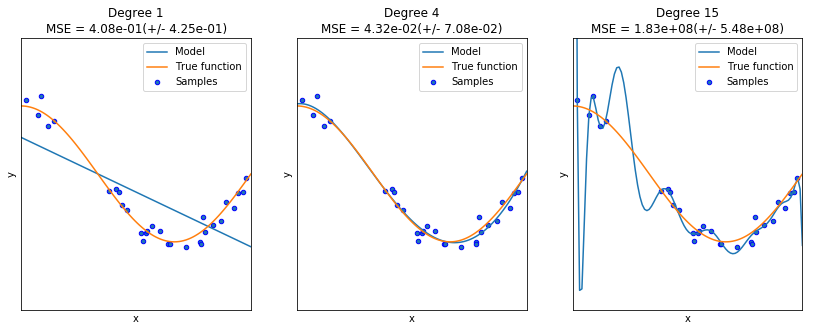

In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = linear_model.LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

### Bonus example:

<a href="https://i.ytimg.com/vi/dBLZg-RqoLg/maxresdefault.jpg"><img src="https://drive.google.com/uc?export=view&id=1xYDlJTVv0hTsZWFf4sz61rMqmAiDYEdL" width=600 heigth=600></a>

*Please observe, that in the classification example there are datapoints quite close to the decision boundary, so _"margin"_ is low.*



## [Akaike](https://en.wikipedia.org/wiki/Akaike_information_criterion) vs Generalization error

- Nice example on linear models
- R tutorial, nicely commented, [here](https://rdrr.io/github/profpetrie/regclass/man/overfit.demo.html)
- Akaike Information Criterion: "When a statistical model is used to represent the process that generated the data, the model will almost never be exact; so some information will be lost by using the model to represent the process. AIC estimates the relative information lost by a given model: **the less information a model loses, the higher the quality of that model**. (In making an estimate of the information lost, AIC deals with the **trade-off between the goodness of fit of the model and the simplicity** of the model.)"

- The example gradually adds polynomial components to a regression
- As AIC rises, the model is getting "worse"
- Overfitting is gradually **increasing after an optimal value**, showing that the model mainly learns noise
- Overfitting: the model overfits on the train data, and **doesn't generalize to the test/holdout set** (unseen data) --- as seen here by the root mean square error on the holdout set

<a href="http://drive.google.com/uc?export=view&id=1guMqUljUwZ7xq-vILKhTw8L2TkNvcyTi"><img src="https://drive.google.com/uc?export=view&id=1Yu8-3oQrc0R6rNQO9CU3k4hVv8FW52d6" width=400 heigth=400></a>


## Conclusion

Traditional statistics tells us:
<font size="5" color="red">Use a model with enough capacity but not bigger!</font>

**This will prove to be a tricky assumption later on, stay tuned! :-)**


## How to proceed?

**Gradually increasing complexity**

- "By hand": Choose a simple model and then gradually move towards more complicated ones
- "Automatically": Regularization


### Demonstration:

Controlling for the capacity of polynomial terms by **L1-L2 regularization**

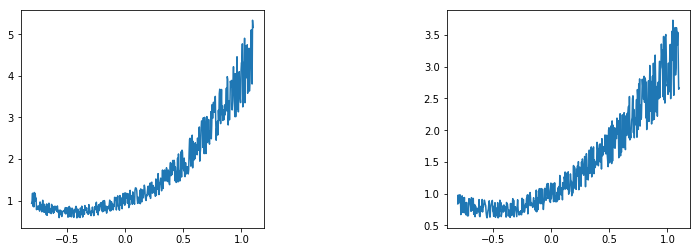

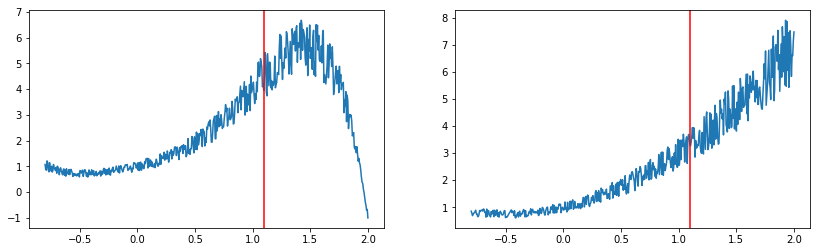

And after...


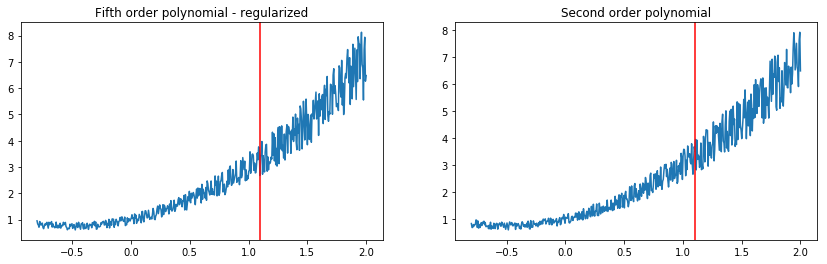

We kept the coefficients of the polynomials over the second power artificially low
by multiplying them with 0.000000001.


In [ ]:
import matplotlib.pyplot as plt
import pylab
import numpy as np

pylab.rcParams['figure.figsize'] = (12, 4)

def generate_poly_base(degree, min=-0.8, max=1.1, num=500, lastneg=True, regularize=False):

    coefs = np.ones(degree+1)
    if regularize:
        coefs = [co*0.000000001 for co in coefs]
        
        coefs[0] = 1.0
        coefs[1] = 1.0
        coefs[2] = 1.0

    if lastneg:
        coefs[-1] = -1.0*coefs[-1]
    x1=np.linspace(min,max,num)
    x2=np.zeros(x1.shape)
    
    for d in range(degree+1):
        x2+=coefs[d]*(x1**d)
    
    x2=x2+x2*np.random.uniform(low=-0.2, high=0.2,size=len(x2))
    
    return np.array([x1,x2])


fig, axes = plt.subplots(nrows=1, ncols=2)

m1 = generate_poly_base(5, regularize=False)
axes[0].plot(m1[0],m1[1])

m2 = generate_poly_base(2, lastneg=False)
axes[1].plot(m2[0],m2[1])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.75, hspace=None)

plt.show()

pylab.rcParams['figure.figsize'] = (14, 4)

fig, axes = plt.subplots(nrows=1, ncols=2)

m3 = generate_poly_base(5,max=2.0, regularize=False)
axes[0].plot(m3[0],m3[1])
axes[0].axvline(x=1.1, c="r")

m4 = generate_poly_base(2,max=2.0, lastneg=False)
axes[1].plot(m4[0],m4[1])
axes[1].axvline(x=1.1, c="r")

plt.show()
plt.close()

print("And after...")
fig, ((ax3, ax4)) = plt.subplots(nrows=1, ncols=2)

m5 = generate_poly_base(5,max=2.0, regularize=True)
ax3.plot(m5[0],m5[1])
ax3.axvline(x=1.1, c="r")
ax3.set_title("Fifth order polynomial - regularized")

m6 = generate_poly_base(2,max=2.0 ,lastneg=False)
ax4.plot(m6[0],m6[1])
ax4.axvline(x=1.1, c="r")
ax4.set_title("Second order polynomial")
plt.subplots_adjust(left=0.11)

plt.show()

print("We kept the coefficients of the polynomials over the second power artificially low")
print("by multiplying them with 0.000000001.")

We will come back to the topic of regularization later on. The important takeaway is: if the weight vector of a polynomial regression is constrained to be small everywhere (L2) or only non-zero somewhere (L1) the model cannot utilize its full capacity, thus it tends to be more "Occam like".
(It has some sideeffects though, see [here](http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/).)

<a id="performance"></a>
# [Estimation of performance](https://en.wikipedia.org/wiki/Regression_validation)

"Making sure it works!"


* Goodness of fit vs. badness of fit (higher vs lower better)

* loss function in optimization (must be the-lower-the-better type!) vs. evaluation of performance

* absolute vs. relative measure


## Some typical metrics for evaluating regression

* [**R-squared**](https://en.wikipedia.org/wiki/Coefficient_of_determination) ($R^2$) is a relative measure of fit.
* [**RMSE** (root mean square error)](https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e) is an absolute measure of fit, the standard deviation of the residuals.
$$\mathbf{RMSE} ={\sqrt {\frac {\sum _{i=1}^{n}({\hat {y}}_{i}-y_{i})^{2}}{n}}}$$
where $n$ is the number of samples, $\hat y$ is the prediction for sample, $y$ the actual value.

* [**MAE** (mean absolute error)](https://en.wikipedia.org/wiki/Mean_absolute_error) uses absolute value of residuals instead of their square.

* [**MAPE** (mean absolute percentage error)](https://www.statisticshowto.com/mean-absolute-percentage-error-mape/) is the relative measure counterpart to MAE.


[See a comparison of some of these metrics here, for example.](https://www.dataquest.io/blog/understanding-regression-error-metrics/)

#### R2, coefficient of determiniation

> The proportion of variation that is explained by our model.

* Several definitions, 
$$R^2 = 1 - \frac{\text{residual sum of squares}}{\text{total sum of squares}} = \frac{\text{explained sum of squares}}{\text{total sum of squares}}$$

* Values *typically between 0 and 1*, but may be smaller than 0 in some cases.
  * When **R2 = 1**, our model is a perfect fit of the data
  * If **R2 is near 0**, our model doesn't explaine the data.
  * When **R2 < 0**, the mean of the data is a better fit than our model!

* A refinement: *adjusted R2*.
  - R2 gets better with the addition of input variables
  - adjusted R2 also takes into account the number of input variables used
  - adjusted R2 penalizes more variables => is always *smaller* than R2


In more detail...

In regression, the ["**coefficient of determination (R2, R-Squared)**" - (Wikipedia)](https://en.wikipedia.org/wiki/Coefficient_of_determination) is a typical way to measure goodness of fit:

"A data set has n values marked $y_1,...,y_n$ (collectively known as $y_i$ or as a vector $y = [y_1,...,y_n]^T)$, each associated with a predicted (or modeled) value $f_1,...,f_n$ (known as $f_i$, or sometimes $ŷ_i$, as a vector $f$).

Define the residuals as $$e_i = y_i − f_i$$ (forming a vector $e$).

If  $\bar {y}$ is the mean of the observed data:

$${\bar {y}}={\frac {1}{n}}\sum _{i=1}^{n}y_{i}$$

then the variability of the data set can be measured using three sums of squares formulas:

The total sum of squares (proportional to the variance of the data):
$$SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2},$$

The regression sum of squares, also called the explained sum of squares:
$$SS_{\text{reg}}=\sum _{i}(f_{i}-{\bar {y}})^{2},$$ 

The sum of squares of residuals, also called the residual sum of squares:
$$SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,$$ 

The most general definition of the coefficient of determination ($R^{2}$) is:

$$ R^{2}\equiv 1-\color{blue}{SS_{\rm {res}} \over \color{red}{SS_{\rm {tot}}}}.\,$$ 

<a href="https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/800px-Coefficient_of_Determination.svg.png"><img src="https://drive.google.com/uc?export=view&id=1Lersd_jQGWfGRMZqfbitj0Z-Z7c1uDI4" width=600px></a>

- The better the linear regression (on the right) fits the data in comparison to the simple average (on the left graph), the closer the value of $R^{2}$ is to 1. 
- Sum of Areas of blue squares represent squared residuals with respect to the linear regression. 
- Sum of areas of the red squares represent squared residuals with respect to the average value.


#### MAE, MAPE, MSE, RMSE

* **MAE = mean absolute error**
  * E.g., if you try to forecast temperatre, and your MAE is 4 degrees Celsius, then on average, your forecast is 4 degrees Celsius off from the actual temperature.
  * Upside:
    * easy to interpret
    * not affected by outliers
  * Important downside: not differentiable at its minimum (<= "v"-shape) -> potential convergence issues.

* **MAPE = mean absolute percentage error**
  * Take the errors as percentages of the actual values. Then take the mean of the absolute percentages.
  * E.g., if you try to forecast sales, if your MAPE is 9%, then your predictions are on average 9% off from the actual sales.
  * Works best if there are no extremes to the data (and no zeros --- be careful of zero division!).

* **MSE = mean of squared errors**
  * The residual sum of squares normalized by sample size
  * MSE is a typical loss function. -> Large mistakes count for more (vs. MAE).
  * Downside: large weight of outliers 
  
* **RMSE** = root of MSE.

* **Huber loss** (recall robust regression): for loss values less than a threshold, use MSE (=> quadratic); for loss values greater than threshold, use the MAE (=> outliers don't get that much weight).

## [Analysis of residuals](https://en.wikipedia.org/wiki/Regression_validation#Analysis_of_residuals)

- Analyze whether assumptions of model hold: e.g. normal distribution of error term, constant variance, autocorrelation of error term
- Find whether there are systematic errors that bias model (and can be used to improve it) model

[Interpreting residual plots to improve your regression](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)
"Ideally your plot of the residuals look like one of these:

<a href="http://docs.statwing.com/wp-content/uploads/2014/10/Nice-residual-plot2.png"><img src="https://drive.google.com/uc?export=view&id=1hhnGhnDhzb7vVb25QYdXJQresiWrmhlN" width=400 heigth=400></a>

That is,
- (1) they’re pretty symmetrically distributed, tending to cluster towards the middle of the plot
- (2) in general there aren’t clear patterns"


### Interesting failure case

<a href="http://docs.statwing.com/wp-content/uploads/2014/10/Nonlinear-residual-21.png"><img src="https://drive.google.com/uc?export=view&id=1Ud44n56Z3rUCGWrgi3ZIsVs3XqFmV5Ha" width=400 heigth=400></a>

**- Non-linear relation** 


What if we would like to have an estimate that is telling us something beyond this sample - aka. test for overfitting?



## [Holdout method (aka. train-valid-test split)](https://en.wikipedia.org/wiki/Training,_test,_and_validation_sets#Holdout_dataset)


### Train-test split
- Target: estimate of "fit" outside the training
- **Randomly choose** to "hold out" part of the data (don't let the model see it for training)
- After training is finished, we predict on the data, and use the measured metric as an estimate of generalization

Now this brings us _something_, but two criticisms apply:
1. **Only _one_ point estimate of the possible generalization error distribution** (cross-validation will try to mitigate this a bit)
2. No change in patterns for new data, but in real life e.g. **covariate shift** -> training data should be representative of future 

Pure empirical risk minimization cannot help here (covariance shift, out of sample changes).

Yet there may be mechanisms to improve out of sample generalization which we will learn about.


### Train-valid-test split

- Tempted - rightfully - to modify some hyperparameters (or even choose a different model) **in light of test result**
- **Hyperparameter**: parameter, whose value is set _before_ learning
- If we do so, test influences (**contaminates**) the training
- -> Can no longer be regarded as an unbiased estimate of performance. 
- -> Do a threefold split:
- **Train data:** as name implies, use it for training
- **Validation (valid) data:** use it for hyperparameter tuning and model selection
- **Test data:** Use it ONLY once for the final estimate of goodness when nothing else is changed anymore



<a href="https://dziganto.github.io/assets/images/train-validate-test.png?raw=true"><img src="https://drive.google.com/uc?export=view&id=1Fg8MBBU9nckaWGzY8C8NC6zBY7__65xP"></a>

[source](https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/)

**Warning:** 
- Nomenclature sometimes mixed up 
- Some people call test valid and vice versa 
- We'll stick to above definition.

**Advice: for random choice and splitting use `sklearn.model_selection.train_test_split`**


## K-Fold-Cross-validation

- Iterative estimate of model performance 
- Repeatedly ($k$ times) leave out a part of the dataset and do the teaching, 
- Finally estimating the performance as the average "goodness"

<a href="https://i.stack.imgur.com/LttqQ.png"><img src="https://drive.google.com/uc?export=view&id=1ICN1POksXyrJMugG10JYtLyCGhAKkUQs" weights=500 heigth=500></a>

Cross validation can also be used with train-valid-test split

<a href="https://i.stack.imgur.com/0SQJq.png"><img src="https://drive.google.com/uc?export=view&id=1iXwDAhNi9_N2dWZJJ6u7SWOLWQwLOTYy" weights=500 heigth=500></a>

[source](https://stats.stackexchange.com/questions/338044/what-is-exact-way-to-do-k-fold-validation)



## Words of warning:
**IMPORTANT:
_NEVER_ use Test for anything else just look at it once at the end and either we launch the deployment or not!**


### Accidental contamination

**Source: [here](https://rapidminer.com/blog/learn-right-way-validate-models-part-4-accidental-contamination/)**

Three good examples for contamination:


#### 1. Contamination by normalization

- **Normalization of data before train-valid-test split** 
- Normalization: adjusting values of different scale to notionally common scale (e.g. deviation from mean)
- **"Carry back" the mean, min or max information of the test part** to the whole data. 
- This either hurts or not, but it is better to be conscious about it



#### 2. Contamination by hyperparameter optimization on test data

- Choose a **hyperparameter** for the original training **that looks good on test**
- **[Selection bias](https://en.wikipedia.org/wiki/Selection_bias)** so I will in the end fit the model to my choice
- Same logic as overfitting




#### 3. Contamination by feature selection based on test data

- Only choose / select the features that are appropriate in regard to the test
- Then I don't have a test anymore

An anecdote:

<a href="http://drive.google.com/uc?export=view&id=19VoYBU4-LWOqh4NCEzXz95jYmp5OZhm2"><img src="https://drive.google.com/uc?export=view&id=18oEO-8RCvg4EwOA5txoBpT31B3sdyXUb" weights=500 heigth=500></a>



<a id="regression_continue"></a>
# Regression continued

"So how do we not overfit?"

## Ridge regression (L2, Tyihonov regularization)
- Error function can have multiple error terms in it (becomes a cost function)
- Ridge regression adds a squared term to the original reconstruction loss
- Namely:
$$ \sum_{i=1}^n(y_i-\hat{y}_i)^2 + \alpha \sum\beta^2 $$

- **The error term will force out correlated variables**
- The model is more complex then the simple linear case, but [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) is being controlled

Detailed description [here](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf)

**Effect: small values of the coefficients**



## LASSO (Least Absolute Shrinkage and Selection Operator, L1-regularization)

- **Also regularizing weights** (coefficients), but not the squared value of them, but instead the **absolute value**, this causes the coefficients to become ["sparse"](https://en.wikipedia.org/wiki/Sparse_matrix)
- Many attributes will be zero, so we can describe the target $y$ with less explanatory variables

$$min \sum_{i=1}^n(y_i-\hat{y}_i)^2 + \alpha \sum|\beta|  $$

**Effect: Only some coefficients are non-zero. Sparse solution, more interpretable!**


### Visual demonstration

<a href="http://drive.google.com/uc?export=view&id=1aIjoCPn7frUexrIapEKzl0OL2S5J_e2P"><img src="https://drive.google.com/uc?export=view&id=1bcBXh61V2pGM5TKLMADBDF9n4UbMPTv4" width=55%></a>


## Elastic-net

- In case of $n<<p$ (_Big-p (Predictors), Little-n (Samples)_) LASSO chooses maximally $n$ descriptors, and only chooses one from the groups of correlated descriptors.
- Thus combining Ridge and LASSO has advantages

$$min \sum_{i=1}^n(y_i-\hat{y}_i)^2 + \alpha \sum|\beta| + (1-\alpha) \sum \beta^2  $$


Detailed description [here](https://web.stanford.edu/~hastie/TALKS/enet_talk.pdf)

### Visual demonstration
<a href="https://www.safaribooksonline.com/library/view/machine-learning-with/9781787121515/assets/03902148-aac8-4968-a384-3ac2c2180e21.png"><img src="https://drive.google.com/uc?export=view&id=1VO1okrcKKmBz4-JgNQZGTJFJ3RZ12I7y" width=55%></a>

**Conclusion:**

**Capacity control by weight control (through error terms) was the main method for avoiding overfitting in classical models.** 

**This will have some philosophical implications when it comes to neural networks later on.**